In [1]:
import math
import random
import matplotlib.pyplot as plt

In [2]:
f=open('Input/input2.txt','r')

In [3]:
n = int(f.readline())
xcord = [float(x) for x in f.readline().split(' ')][:n]
ycord = [float(x) for x in f.readline().split(' ')][:n]
print(f'{n}')

20


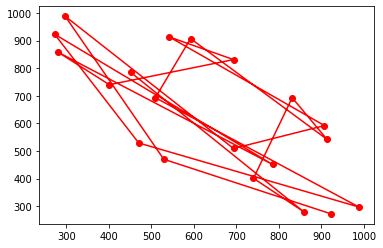

In [4]:
plt.show()
axes = plt.gca()
line, = axes.plot(xcord, ycord,'ro-')

In [5]:
def dist(xcord, ycord, i, j):
  x1 = xcord[i]
  y1 = ycord[i]
  x2 = xcord[j]
  y2 = ycord[j]
  return (math.sqrt((x1-x2)**2 + (y1-y2)**2))

In [6]:
x = [i for i in range(n)]
xcord = [xcord[x[i]] for i in range(n)]
ycord = [ycord[x[i]] for i in range(n)]

initial_cost = sum([dist(xcord, ycord, i, (i+1)%n) for i in range(n)])



In [7]:
def heuristic(xcord, ycord, i, j, current_cost):
  total = current_cost

  if i == 0 and j == n-1:
    i, j = j, i

  if j!=(i+1)%n:
    total -= dist(xcord, ycord, i, (i+1)%n)
    total -= dist(xcord, ycord, j, (j-1+n)%n)
    total += dist(xcord, ycord, j, (i+1)%n)
    total += dist(xcord, ycord, i, (j-1+n)%n)

  total -= dist(xcord, ycord, i, (i-1+n)%n)
  total -= dist(xcord, ycord, j, (j+1)%n)
  total += dist(xcord, ycord, i, (j+1)%n)
  total += dist(xcord, ycord, j, (i-1+n)%n)
  return (total)

In [8]:
def draw(finished, iteration, cost):
  newxcord = xcord.copy() + [xcord[0]]
  newycord = ycord.copy() + [ycord[0]]

  title = "Final " if finished else "iteration no. %d \n" % iteration
  title = title + ("total distance = %.2f \n" % cost)
  plt.title(title, fontsize = 15)

  plt.show()
  axes = plt.gca()
  line, = axes.plot(newxcord, newycord, 'ro-')

In [9]:
def Accent_Hill_Climbing(xcord, ycord, initial_cost, x):
  current_cost = initial_cost


  for t in range(100):

    draw(False, t+1, current_cost)

    # accent_results.append(current_cost)
    print("iteration = ", t+1)
    print("total distance = %.2f" % current_cost)

    newtotal = current_cost
    swapi, swapj = -1, -1
    

    for i in range(n):
      for j in range(n):
        if i != j and i < j:

          neighbour = heuristic(xcord, ycord, i, j, current_cost)

          if neighbour < newtotal:
            newtotal = neighbour
            swapi = i
            swapj = j

    if newtotal < current_cost:
      x[swapi], x[swapj] = x[swapj], x[swapi]
      xcord[swapi], xcord[swapj] = xcord[swapj], xcord[swapi]
      ycord[swapi], ycord[swapj] = ycord[swapj], ycord[swapi]
      current_cost = newtotal
      print("swapped ", swapi, swapj)
    else:
      # halt 
      print("finish")
      break


  print("Final order = ", x)
  print("Initial cost = ", initial_cost)
  print("Final cost = ", current_cost)
 

  draw(True, 0, current_cost)
  plt.show()

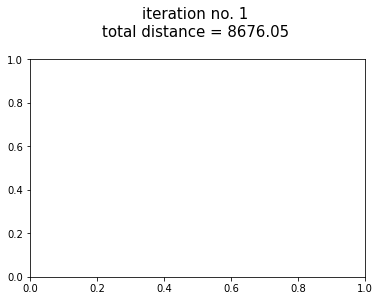

iteration =  1
total distance = 8676.05
swapped  2 9


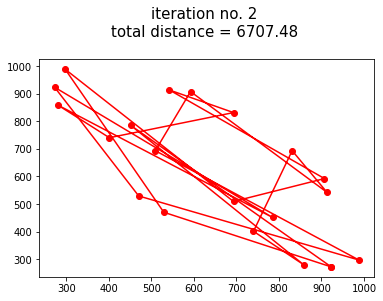

iteration =  2
total distance = 6707.48
swapped  12 19


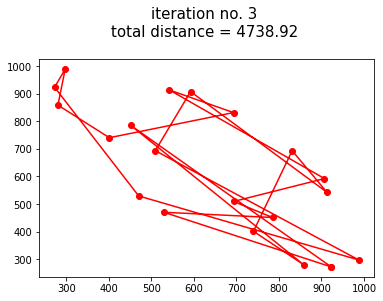

iteration =  3
total distance = 4738.92
swapped  4 14


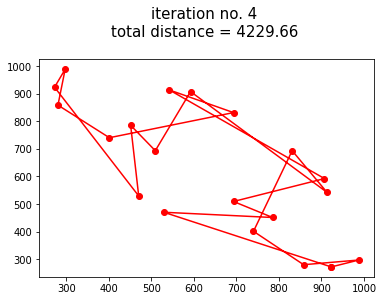

iteration =  4
total distance = 4229.66
swapped  1 2


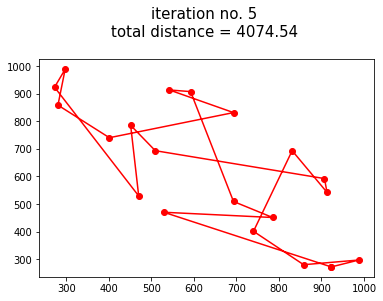

iteration =  5
total distance = 4074.54
swapped  11 12


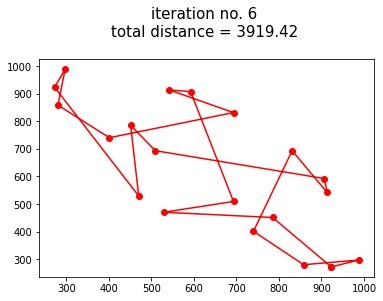

iteration =  6
total distance = 3919.42
swapped  3 13


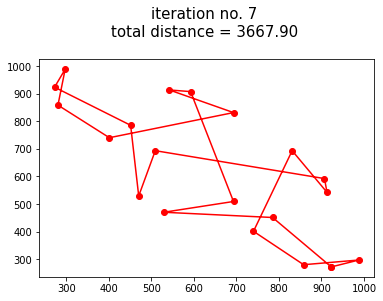

iteration =  7
total distance = 3667.90
swapped  2 13


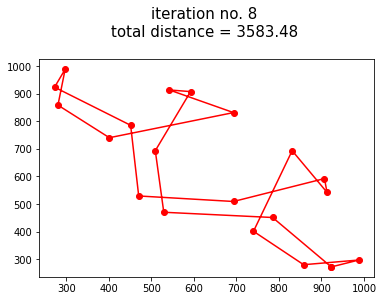

iteration =  8
total distance = 3583.48
swapped  3 6


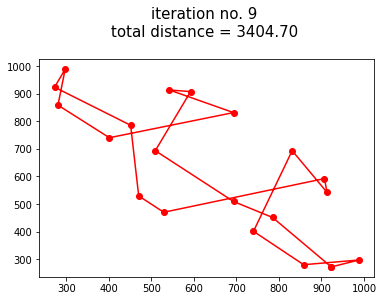

iteration =  9
total distance = 3404.70
swapped  2 16


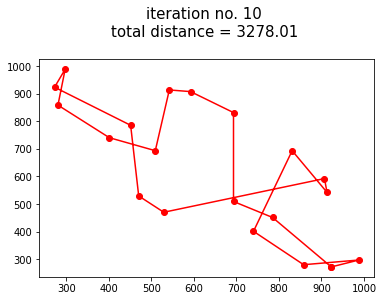

iteration =  10
total distance = 3278.01
swapped  6 11


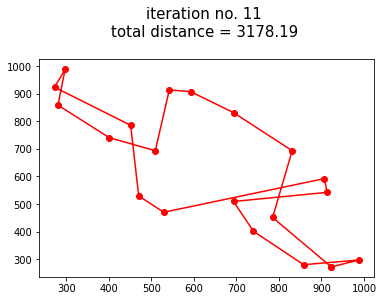

iteration =  11
total distance = 3178.19
swapped  14 16


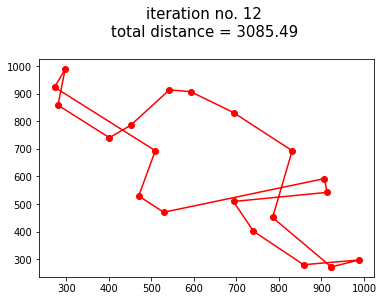

iteration =  12
total distance = 3085.49
swapped  1 16


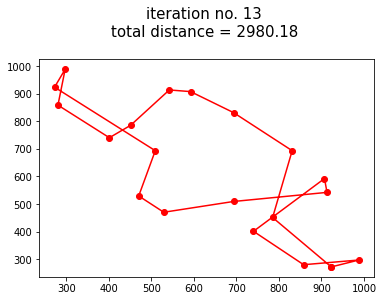

iteration =  13
total distance = 2980.18
swapped  0 19


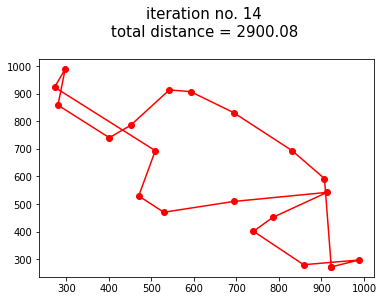

iteration =  14
total distance = 2900.08
swapped  9 10


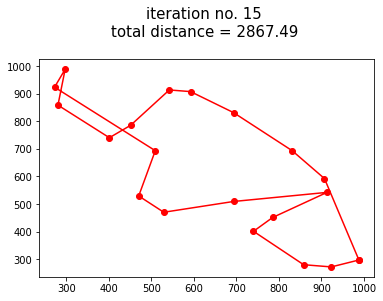

iteration =  15
total distance = 2867.49
swapped  15 17


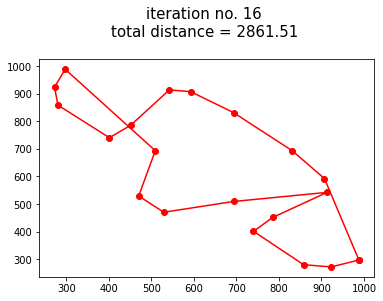

iteration =  16
total distance = 2861.51
swapped  0 17


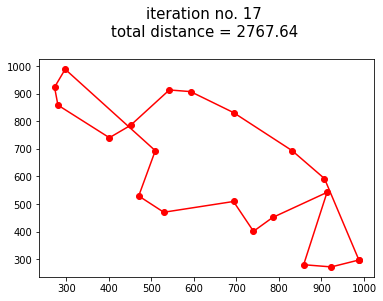

iteration =  17
total distance = 2767.64
swapped  17 18


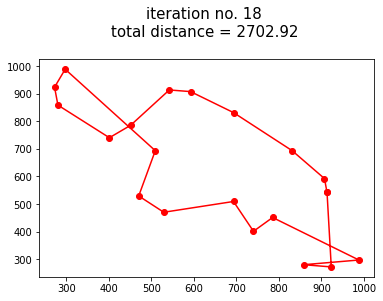

iteration =  18
total distance = 2702.92
swapped  18 19


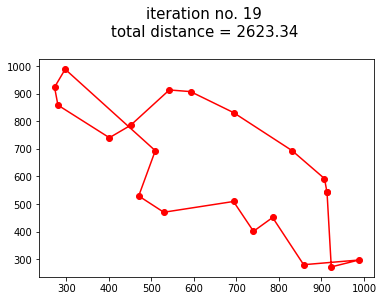

iteration =  19
total distance = 2623.34
swapped  15 16


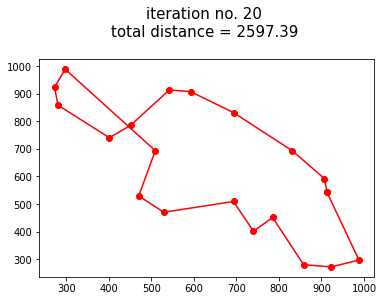

iteration =  20
total distance = 2597.39
finish
Final order =  [15, 4, 16, 6, 14, 5, 19, 7, 8, 10, 2, 13, 11, 1, 3, 9, 17, 18, 0, 12]
Initial cost =  8676.04585485561
Final cost =  2597.3948659983325


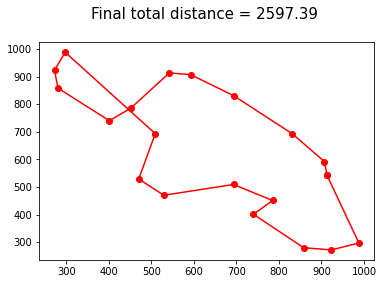

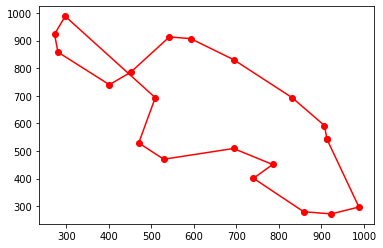

In [10]:
Accent_Hill_Climbing(xcord, ycord, initial_cost, x)